#                                        EDA of Hotel Bookings Demand

In [ ]:
# Exploratory Data Analysis and Machine learning prediction  on the Kaggle hotel booking data
# https://towardsdatascience.com/all-about-pandas-groupby-explained-with-25-examples-494e04a8ef56#:~:text=The%20groupby%20is%20one%20of,values%20for%20the%20generated%20groups.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('hotel_bookings (1).csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


### We Will Understand the data

In [6]:
df.shape

(119390, 32)

In [7]:
pd.set_option('display.max_columns',32)

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [11]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [12]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [13]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [14]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [15]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [16]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [17]:
df['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

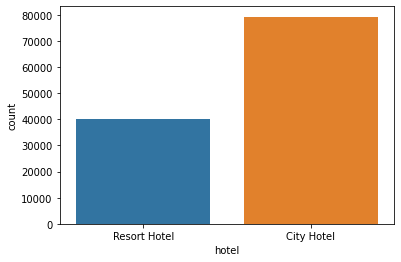

In [20]:
sns.countplot(data=df,x='hotel')
plt.show()

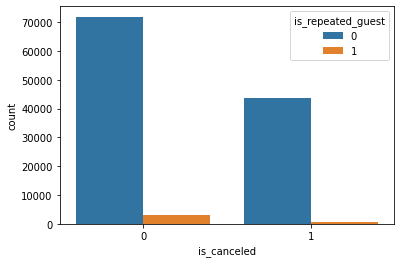

In [21]:
sns.countplot(data=df,x='is_canceled',hue='is_repeated_guest')
plt.show()

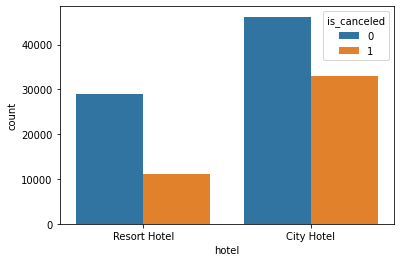

In [22]:
sns.countplot(data=df,x='hotel',hue='is_canceled')
plt.show()

# Data Preparation

### Missing Data

In [23]:
df.isnull().values.any()

True

In [24]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [26]:
#Replacing missing Values with 0
df.fillna(0,inplace=True)

In [27]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [28]:
#Meal contains values "Undefined", which is equal to SC
df["meal"].replace("Undefined","SC", inplace=True)

In [29]:
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [30]:
Subset=df[(df['children']==0) & (df['adults']==0) & (df['babies']==0)]

In [31]:
Subset[['adults','babies','children']]

,adults,babies,children
2224,0,0,0.0
2409,0,0,0.0
3181,0,0,0.0
3684,0,0,0.0
3708,0,0,0.0
...,...,...,...
115029,0,0,0.0
115091,0,0,0.0
116251,0,0,0.0
116534,0,0,0.0


In [32]:
type(Subset)

pandas.core.frame.DataFrame

In [33]:
Delete=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [34]:
type(Delete)

pandas.core.series.Series

In [35]:
Delete

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [38]:
df[Delete]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [36]:
data=df[~Delete]

In [135]:
data.shape

(119210, 33)

In [37]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [46]:
Subset=data[(data['children']==0) & (data['adults']==0) & (data['babies']==0)]

In [47]:
Subset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [48]:
data.shape

(119210, 32)

In [49]:
119390-119210

180

In [50]:
data.to_csv('Updataed_Hotel_Booking.csv', index=False)

## Where do the Guests come from?

In [51]:
guest_country=data[data['is_canceled']==0]['country'].value_counts().reset_index()
guest_country.columns=['country','Number of guests']

In [52]:

guest_country

,country,Number of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,ATF,1
162,MRT,1
163,LCA,1
164,SYC,1


In [80]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [81]:
total_guests = guest_country["Number of guests"].sum()
print(total_guests)

75011


In [55]:
guest_country["Guests in %"] = round(guest_country["Number of guests"] / total_guests * 100, 2)
guest_country

,country,Number of guests,Guests in %
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,ATF,1,0.00
162,MRT,1,0.00
163,LCA,1,0.00
164,SYC,1,0.00


In [82]:
trace= go.Bar(
    x=guest_country["country"],
    y=guest_country['Number of guests'],
    marker=dict(color='#CD7F32') 
)
data1 = [ trace]
layout = go.Layout(
    title='Guests by Country'
)
fig = go.Figure(data=data1, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [79]:
# !pip3 install plotly

In [76]:
#  C:\Python311\python.exe -m pip install --upgrade pip3

In [77]:
# !pip3 install plotly

In [83]:
map_guest = px.choropleth(guest_country,
                    locations=guest_country['country'],
                    color=guest_country['Number of guests'], 
                    hover_name=guest_country['country'], 
                    title="Home country of guests")
map_guest.show()

##### People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.

##### People from all over the world are staying in these two hotels. 50 % of the guests are from Portugal ,Great Britain and France. 

#### How does the price per night vary over the year?

# To Plot  Price Variation per Person  Graph

In [101]:
data["adults"]

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: adults, Length: 119210, dtype: int64

In [104]:
data[data["children"]!=0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,...,0,0,G,G,1,No Deposit,241.0,0.0,0,Transient,154.77,0,1,Check-Out,7/5/2015,51.590000
45,Resort Hotel,1,47,2015,July,27,2,2,5,2,2.0,0,BB,PRT,Online TA,TA/TO,...,0,0,G,G,0,No Deposit,240.0,0.0,0,Transient,153.00,0,0,Canceled,6/2/2015,38.250000
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,2.0,0,BB,ESP,Direct,Direct,...,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.00,1,2,Check-Out,7/3/2015,26.750000
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,2.0,0,BB,USA,Online TA,TA/TO,...,0,0,G,H,0,No Deposit,240.0,0.0,0,Transient,153.00,1,0,Check-Out,7/5/2015,38.250000
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,1.0,0,BB,PRT,Offline TA/TO,TA/TO,...,0,0,A,A,0,No Deposit,242.0,0.0,0,Transient,108.73,0,2,Canceled,4/15/2015,36.243333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119270,City Hotel,0,0,2017,August,35,29,0,3,2,1.0,0,BB,ROU,Online TA,TA/TO,...,0,0,A,D,1,No Deposit,9.0,0.0,0,Transient,135.00,0,2,Check-Out,9/1/2017,45.000000
119287,City Hotel,0,167,2017,August,35,27,2,4,2,1.0,0,BB,AUT,Online TA,TA/TO,...,0,0,D,D,1,No Deposit,9.0,0.0,0,Transient,177.75,0,0,Check-Out,9/2/2017,59.250000
119293,City Hotel,0,243,2017,August,35,30,0,3,2,2.0,0,BB,DEU,Online TA,TA/TO,...,0,0,F,F,0,No Deposit,9.0,0.0,0,Transient,189.00,0,3,Check-Out,9/2/2017,47.250000
119318,City Hotel,0,160,2017,August,35,29,0,5,2,1.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,153.90,0,0,Check-Out,9/3/2017,51.300000


In [ ]:
# if guest of same room type have different prices, this indicate that the  price per room was influenced by if they have children or not 

In [89]:
data["adr_Updated"]=data["adr"]/(data["adults"]+data["children"])

C:\Users\Hp\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

In [91]:
resort_hotel=resort.groupby(['arrival_date_month'])['adr_Updated'].mean().reset_index()
resort_hotel

,arrival_date_month,adr_Updated
0,April,43.726059
1,August,83.322653
2,December,37.666300
3,February,30.845022
4,January,31.169218
5,July,70.262366
6,June,56.346298
7,March,34.100690
8,May,42.254335
9,November,30.002893


In [92]:
city_hotel=city.groupby(['arrival_date_month'])['adr_Updated'].mean().reset_index()
city_hotel

,arrival_date_month,adr_Updated
0,April,58.715028
1,August,57.771630
2,December,47.724939
3,February,50.950846
4,January,51.280071
5,July,57.258853
6,June,66.335898
7,March,52.477652
8,May,69.987850
9,November,57.142431


In [93]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,43.726059,58.715028
1,August,83.322653,57.771630
2,December,37.666300,47.724939
3,February,30.845022,50.950846
4,January,31.169218,51.280071
5,July,70.262366,57.258853
6,June,56.346298,66.335898
7,March,34.100690,52.477652
8,May,42.254335,69.987850
9,November,30.002893,57.142431


In [94]:
import sort_dataframeby_monthorweek as sd
final=sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city_hotel
0,January,31.169218,51.280071
1,February,30.845022,50.950846
2,March,34.100690,52.477652
3,April,43.726059,58.715028
4,May,42.254335,69.987850
5,June,56.346298,66.335898
6,July,70.262366,57.258853
7,August,83.322653,57.771630
8,September,50.372746,67.042091
9,October,35.144775,61.800547


In [95]:
px.line(final, x='month',
        y=['price_for_resort','price_for_city_hotel'], 
        title='Room price per night over the Months')

#Summer in Portugal is between June and mid-September 
#while the winter season falls between December 

# Conclusion This clearly shows that the prices in the Resort hotel are much higher during the summer, the price of the city hotel varies less and is most expensive during spring and autumn.

#### How Much Do Guests Pay For A Room Per Night?  

In [ ]:
# Getting unique room types

In [105]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [106]:
data["adr_Updated"]=data["adr"]/(data["adults"]+data["children"])
data

C:\Users\Hp\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,...,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,...,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,...,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,52.200000


In [ ]:
# To plot range of prices of room types per night. The same room types have different prices as it is itntuitive that seasonal factors contribute to the offer prices for the hotel rooms  

C:\Users\Hp\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



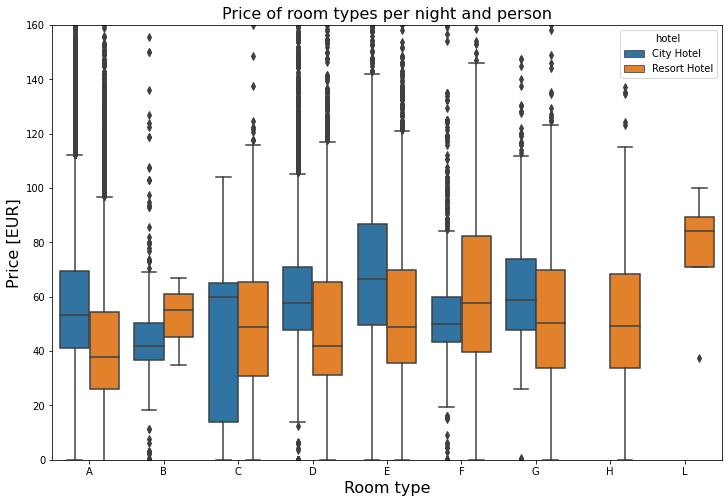

In [107]:
data["adr_Updated"]=data["adr"]/(data["adults"]+data["children"])
valid_guest= data.loc[data["is_canceled"] == 0]
prices = valid_guest[["hotel", "reserved_room_type", "adr_Updated"]].sort_values("reserved_room_type")

plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_Updated",
            hue="hotel",
            data=prices
           )
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)

plt.ylim(0, 160)
plt.show()

In [108]:
prices_C=prices[prices['reserved_room_type']=='C']
prices_C

,hotel,reserved_room_type,adr_Updated
119278,City Hotel,C,104.000000
99432,City Hotel,C,65.000000
99431,City Hotel,C,65.000000
101137,City Hotel,C,55.000000
0,Resort Hotel,C,0.000000
...,...,...,...
27668,Resort Hotel,C,88.500000
39525,Resort Hotel,C,87.500000
15642,Resort Hotel,C,62.500000
15609,Resort Hotel,C,40.500000


In [109]:
prices_City=prices_C[prices_C['hotel']=='City Hotel']
prices_Resort=prices_C[prices_C['hotel']=='Resort Hotel']
prices_Resort

,hotel,reserved_room_type,adr_Updated
0,Resort Hotel,C,0.000000
34951,Resort Hotel,C,30.250000
15955,Resort Hotel,C,47.366667
25990,Resort Hotel,C,62.166667
15960,Resort Hotel,C,90.000000
...,...,...,...
27668,Resort Hotel,C,88.500000
39525,Resort Hotel,C,87.500000
15642,Resort Hotel,C,62.500000
15609,Resort Hotel,C,40.500000


In [110]:
prices_City

,hotel,reserved_room_type,adr_Updated
119278,City Hotel,C,104.0
99432,City Hotel,C,65.0
99431,City Hotel,C,65.0
101137,City Hotel,C,55.0
82509,City Hotel,C,0.0
82508,City Hotel,C,0.0
44693,City Hotel,C,65.0
80557,City Hotel,C,18.5


In [111]:
prices_Resort.describe()

,adr_Updated
count,615.000000
mean,50.549085
std,27.821397
min,0.000000
25%,31.000000
50%,49.000000
75%,65.562500
max,171.000000


#### How long do people stay at the hotels? 

In [112]:
df3=data[data['is_canceled']==0]
df3["total_nights"] = df3["stays_in_weekend_nights"] + df3["stays_in_week_nights"]

C:\Users\Hp\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
df3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0.000000,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0.000000,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,75.000000,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,75.000000,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,49.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,...,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,48.070000,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,...,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,75.143333,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,...,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,78.855000,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,52.200000,7


In [114]:
df4=df3[['total_nights','hotel','is_canceled']]
df4

,total_nights,hotel,is_canceled
0,0,Resort Hotel,0
1,0,Resort Hotel,0
2,1,Resort Hotel,0
3,1,Resort Hotel,0
4,2,Resort Hotel,0
...,...,...,...
119385,7,City Hotel,0
119386,7,City Hotel,0
119387,7,City Hotel,0
119388,7,City Hotel,0


In [115]:
hotel_stay=df4.groupby(['total_nights','hotel']).agg('count').reset_index()

hotel_stay

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [116]:
hotel_stay=hotel_stay.rename(columns={'is_canceled':'Number of stays'})
hotel_stay.head()

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [117]:
hotel_stay_r=hotel_stay[hotel_stay['hotel']=='Resort Hotel']
hotel_stay_r

,total_nights,hotel,Number of stays
1,0,Resort Hotel,371
3,1,Resort Hotel,6579
5,2,Resort Hotel,4488
7,3,Resort Hotel,3828
9,4,Resort Hotel,3321
11,5,Resort Hotel,1899
13,6,Resort Hotel,1205
15,7,Resort Hotel,4434
17,8,Resort Hotel,509
19,9,Resort Hotel,408


In [118]:
hotel_stay_c=hotel_stay[hotel_stay['hotel']=='City Hotel']
hotel_stay_c

,total_nights,hotel,Number of stays
0,0,City Hotel,251
2,1,City Hotel,9155
4,2,City Hotel,10983
6,3,City Hotel,11889
8,4,City Hotel,7694
10,5,City Hotel,3210
12,6,City Hotel,1111
14,7,City Hotel,1245
16,8,City Hotel,205
18,9,City Hotel,119


In [137]:

trace = go.Bar(
    x=hotel_stay_r["total_nights"],
    y=hotel_stay_r["Number of stays"],
    name='Resort Stay'
    )

trace1=go.Bar(
    x=hotel_stay_c["total_nights"],
    y=hotel_stay_c["Number of stays"],
    name='City stay'
    )


data5 = [trace,trace1]
layout = go.Layout(
    title='Total Number of stays by Guest'
)
fig = go.Figure(data=data5, layout=layout)
pyo.plot(fig)

'temp-plot.html'

#### Bookings by market segment 

In [120]:
segments=data["market_segment"].value_counts()
segments

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

In [121]:
segments=data["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

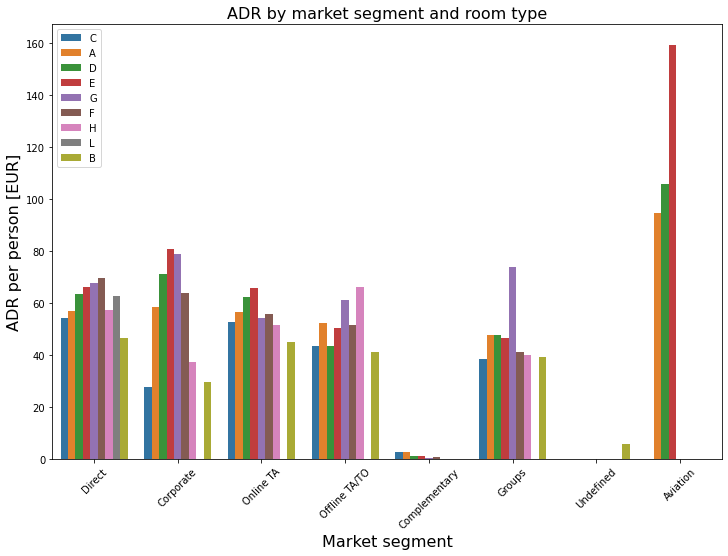

In [122]:
plt.figure(figsize=(12, 8))
sns.barplot(x="market_segment",
            y="adr_Updated",
            hue="reserved_room_type",
            data=data,
            ci=None)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]", fontsize=16)
plt.legend(loc="upper left")
plt.show()

#### How many bookings were canceled?

In [123]:
Cancel=data['is_canceled']==1

In [124]:
cancel=Cancel.sum()

In [125]:
resort_cancelation = data.loc[data["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_cancelation = data.loc[data["hotel"] == "City Hotel"]["is_canceled"].sum()

In [126]:
resort_cancelation

11120

In [127]:
city_cancelation

33079

In [128]:
print(f"Total Booking Cancelled : {cancel} . ")
print(f"Total Resort Hotel Booking Cancelled : {resort_cancelation} . ")
print(f"Total City Hotel Booking Cancelled : {city_cancelation} . ")

Total Booking Cancelled : 44199 . 
Total Resort Hotel Booking Cancelled : 11120 . 
Total City Hotel Booking Cancelled : 33079 . 


#### Which month have the highest number of cancelations?

In [129]:
res_book_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})


In [130]:
res_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3334,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [131]:
import sort_dataframeby_monthorweek as sd
res_cancel_data=sd.Sort_Dataframeby_Month(df=res_cancel_data,monthcolumnname='Month')
res_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,January,2191,325
1,Resort Hotel,February,3102,794
2,Resort Hotel,March,3334,763
3,Resort Hotel,April,3609,1059
4,Resort Hotel,May,3559,1024
5,Resort Hotel,June,3044,1007
6,Resort Hotel,July,4573,1436
7,Resort Hotel,August,4894,1637
8,Resort Hotel,September,3108,1006
9,Resort Hotel,October,3553,978


In [132]:
import sort_dataframeby_monthorweek as sd
cty_cancel_data=sd.Sort_Dataframeby_Month(df=cty_cancel_data,monthcolumnname='Month')
cty_cancel_data

,Hotel,Month,Bookings,Cancelations
0,City Hotel,January,3730,1481
1,City Hotel,February,4950,1899
2,City Hotel,March,6434,2385
3,City Hotel,April,7469,3459
4,City Hotel,May,8221,3653
5,City Hotel,June,7885,3527
6,City Hotel,July,8071,3301
7,City Hotel,August,8967,3600
8,City Hotel,September,7392,3109
9,City Hotel,October,7594,3268


In [133]:

plt.figure(figsize=(12, 8))

trace = go.Bar(
    x=res_cancel_data["Month"],
    y=res_cancel_data["Cancelations"],
    name="Rst Cancelled"
    )
trace1 = go.Bar(
    x=cty_cancel_data["Month"],
    y=cty_cancel_data["Cancelations"],
    name="Cty Cancelled"
    )


data6 = [trace,trace1]
layout = go.Layout(
    title='Total Number of stays by Guest'
)
fig = go.Figure(data=data6, layout=layout)
pyo.plot(fig)

'temp-plot.html'

<Figure size 864x576 with 0 Axes>

In [ ]:
#To predict using machine learning Algorithm:
#1. Perform Feature selection 
#2. Perform Feature Engineering 
#4. Perform Data Preparation 
#3. Build machine Learning model
#4. Predict using the model


In [138]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,49.0


# 1. Perform Feature selection 


In [139]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_Updated
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877,0.017808
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949,-0.127237
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610,0.138222
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202,0.054603
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026,0.022821
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124,-0.039891
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738,-0.027703
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353,-0.319844
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747,-0.078365
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939,0.000578


In [140]:
correlation=data.corr()["is_canceled"]
correlation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
adr_Updated                       0.017808
Name: is_canceled, dtype: float64

In [141]:
correlation.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
adr_Updated                       0.017808
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [142]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'adr_Updated'],
      dtype='object')

In [ ]:
# From this list it is apparent that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most important numerical features.
# However, to predict whether or not a booking will be canceled, the number of booking changes is a possible source of leakage, because this information can change over time.
# I will also not include days_in_waiting_list,booking changes  and arrival_date_year.

# The most important feature to exclude is the "reservation_status":

In [145]:
data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [146]:
list_not=['days_in_waiting_list','arrival_date_year']
list_not

['days_in_waiting_list', 'arrival_date_year']

In [147]:
num_features=[col for col in data.columns if data[col].dtype!='O' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'adr_Updated']

In [149]:
cat_not=['arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country','days_in_waiting_list']
cat_not

['arrival_date_year',
 'assigned_room_type',
 'booking_changes',
 'reservation_status',
 'country',
 'days_in_waiting_list']

In [150]:
cat_features=[col for col in data.columns if data[col].dtype=='O' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [152]:
data_cat=data[cat_features]
data_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,9/6/2017
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,9/7/2017
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,9/7/2017
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,9/7/2017


In [153]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


In [154]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [155]:
data_cat['reservation_status_date']=pd.to_datetime(data_cat['reservation_status_date'])

In [156]:
data_cat['year']=data_cat['reservation_status_date'].dt.year
data_cat['month']=data_cat['reservation_status_date'].dt.month
data_cat['day']=data_cat['reservation_status_date'].dt.day

In [157]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [158]:
data_cat.drop('reservation_status_date',axis=1,inplace=True)

In [159]:
data_cat['cancellation']=data['is_canceled']

In [160]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day', 'cancellation'],
      dtype='object')

In [161]:
data_cat['cancellation']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: cancellation, Length: 119210, dtype: int64

# 2. Perform Feature Engineering 


In [169]:
data_cat['cancellation'].unique()

array([0, 1], dtype=int64)

In [170]:
data_cat['cancellation'].nunique()

2

In [168]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


In [162]:
cols=data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [175]:
data_cat.groupby(['hotel']).sum()

,year,month,day,cancellation
hotel,,,,
City Hotel,159600091,502478,1232103,33079
Resort Hotel,80738421,252554,635474,11120


In [179]:
data_cat.groupby(['hotel']).count()

,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
hotel,,,,,,,,,,,
City Hotel,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163
Resort Hotel,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047


In [172]:
data_cat.groupby(['hotel']).mean()

,year,month,day,cancellation
hotel,,,,
City Hotel,2016.094526,6.347385,15.564127,0.417859
Resort Hotel,2016.091617,6.306440,15.868205,0.277674


In [164]:
print(data_cat.groupby(['hotel'])['cancellation'].mean())


hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64


In [165]:
print(data_cat.groupby(['meal'])['cancellation'].mean())


meal
BB    0.374106
FB    0.598997
HB    0.344653
SC    0.361154
Name: cancellation, dtype: float64


In [166]:
print(data_cat.groupby(['deposit_type'])['cancellation'].mean())



deposit_type
No Deposit    0.284020
Non Refund    0.993624
Refundable    0.222222
Name: cancellation, dtype: float64


In [176]:
data_cat.groupby(['arrival_date_month']).mean()


,year,month,day,cancellation
arrival_date_month,,,,
April,2016.405759,4.238581,15.778570,0.407835
August,2016.045740,7.343698,15.356468,0.377823
December,2015.665483,10.093505,14.967155,0.350348
February,2016.404620,2.926975,15.519250,0.334451
January,2016.388279,3.229015,16.645837,0.305016
July,2016.148371,6.529184,15.989086,0.374644
June,2016.431604,5.713057,15.461341,0.414860
March,2016.413391,3.509316,15.530917,0.322277
May,2016.431664,5.086078,16.068251,0.397029


In [177]:
print(data_cat.groupby(['arrival_date_month'])['day'].mean())


arrival_date_month
April        15.778570
August       15.356468
December     14.967155
February     15.519250
January      16.645837
July         15.989086
June         15.461341
March        15.530917
May          16.068251
November     15.893073
October      15.513232
September    15.482952
Name: day, dtype: float64


In [ ]:
print(data_cat.groupby(['arrival_date_month'])['cancellation'].mean())


In [163]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean())
    print('\n')

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64


arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancellation, dtype: float64


meal
BB    0.374106
FB    0.598997
HB    0.344653
SC    0.361154
Name: cancellation, dtype: float64


market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000
Name: cancellation, dtype: float64


distribution_channel
Corporate    0.220568
Direct       0.174868
GDS          0.191710
TA/TO        0.410598
Undefined    0.800000
Name: cancellation, dtype: float64


reserved_room_type
A    0.391567
B    0.329148
C    0.330

In [180]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean().to_dict())
    print('\n')
    

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}


{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.36115378050861924}


{'Aviation': 0.22127659574468084, 'Complementary': 0.12225274725274725, 'Corporate': 0.18761832639151838, 'Direct': 0.15371165156572883, 'Groups': 0.6110858471022181, 'Offline TA/TO': 0.3433132081713671, 'Online TA': 0.3675897035881435, 'Undefined': 1.0}


{'Corporate': 0.22056833558863329, 'Direct': 0.1748682499486688, 'GDS': 0.19170984455958548, 'TA/TO': 0.41059846547314577, 'Undefined': 0.8}


{'A': 0.39156661581638, 'B': 0.329147982062780

In [181]:
df=data_cat.copy()

In [182]:

for col in cols:
    dict=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict)
    

In [183]:
data_cat.head(20)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0
5,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0
6,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,3,0
7,0.277674,0.374644,0.598997,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,3,0
8,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,5,6,1
9,0.277674,0.374644,0.344653,0.343313,0.410598,0.318108,0.28402,0.407864,2015,4,22,1


In [184]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [185]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests,adr_Updated
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0,0.0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0,0.0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0,75.0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0,75.0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1,49.0


In [188]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

KeyError: "['cancellation'] not found in axis"

In [189]:
dataframe.shape

(119210, 30)

# Handling Outliers

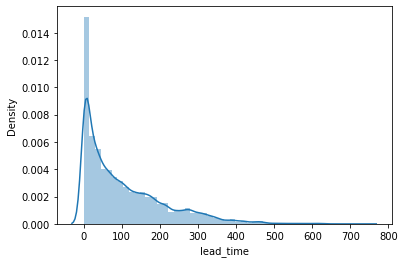

In [190]:
sns.distplot(dataframe['lead_time'])
plt.show()

In [192]:
import numpy as np

def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])


In [193]:
handle_outlier('lead_time')

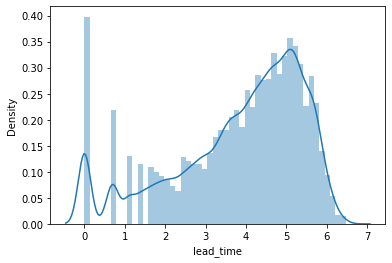

In [194]:
sns.distplot(dataframe['lead_time'].dropna())
plt.show()

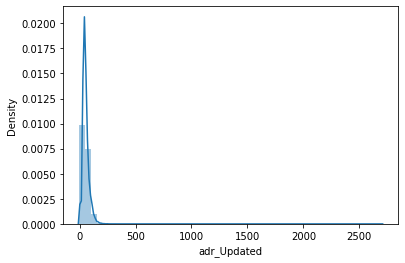

In [195]:
sns.distplot(dataframe['adr_Updated'])
plt.show()

In [196]:
handle_outlier('adr_Updated')

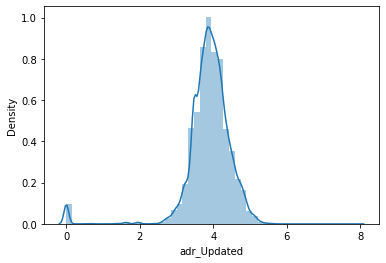

In [197]:
sns.distplot(dataframe['adr_Updated'].dropna())
plt.show()

In [198]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               0
required_car_parking_spaces 

In [199]:
dataframe.dropna(inplace=True)

In [201]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               0
required_car_parking_spaces 

In [200]:
# seperating dependent and independent  features 
y=dataframe['is_canceled']
x=dataframe.drop('is_canceled',axis=1)

In [ ]:
# Using lasso regression to obtain important features

In [206]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [207]:

# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [208]:
feature_sel_model.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True, False])

In [210]:
cols=x.columns
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day', 'lead_time',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'adr_Updated'],
      dtype='object')

In [211]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = cols[(feature_sel_model.get_support())]

In [212]:
# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 29
selected features: 12


In [213]:
selected_feat

Index(['deposit_type', 'year', 'month', 'day', 'lead_time',
       'arrival_date_week_number', 'previous_cancellations', 'booking_changes',
       'company', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [215]:
x=x[selected_feat]
x

,deposit_type,year,month,day,lead_time,arrival_date_week_number,previous_cancellations,booking_changes,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.28402,2015,7,1,5.837730,27,0,3,0.0,0.00,0,0
1,0.28402,2015,7,1,6.603944,27,0,4,0.0,0.00,0,0
2,0.28402,2015,7,2,2.079442,27,0,0,0.0,75.00,0,0
3,0.28402,2015,7,2,2.639057,27,0,0,0.0,75.00,0,0
4,0.28402,2015,7,3,2.708050,27,0,0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.28402,2017,9,6,3.178054,35,0,0,0.0,96.14,0,0
119386,0.28402,2017,9,7,4.634729,35,0,0,0.0,225.43,0,2
119387,0.28402,2017,9,7,3.555348,35,0,0,0.0,157.71,0,4
119388,0.28402,2017,9,7,4.700480,35,0,0,0.0,104.40,0,0


### splitting dataset & model Building


In [216]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [217]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [218]:
y_pred=logreg.predict(x_test)

In [219]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[15474,  3165],
       [ 5316,  5848]], dtype=int64)

In [220]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score


0.7154313324161997

In [221]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)

In [222]:
score

array([0.68081537, 0.73223723, 0.71990605, 0.62738025, 0.73617985,
       0.70338059, 0.60104018, 0.73844476, 0.72997232, 0.60587248])

In [223]:
score.mean()

0.6875229080822349

# 3. Build machine Learning model


In [225]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [226]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [227]:


for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    # Make predictions.
    predictions = model.predict(x_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[15474  5316]
 [ 3165  5848]]
0.7154313324161997


Naive Bayes
[[8872 1285]
 [9767 9879]]
0.6291648491762575


RandomForest
[[18519  1125]
 [  120 10039]]
0.9582256819783244


Decision Tree
[[17840   795]
 [  799 10369]]
0.9465154514646177


KNN
[[18011  2752]
 [  628  8412]]
0.886588598463242




# 4. Perform Data Preparation 


In [ ]:
#To predict using machine learning Algorithm:
#1. Perform Feature selection 
#2. Perform Feature Engineering 
#4. Perform Data Preparation 
#3. Build machine Learning model
#4. Predict using the model
